In [ ]:
#@title **Importar Librerias**

from google.colab import drive
import os
from pathlib import Path
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [ ]:
#@title **Montar la unidad de Google Drive**

drive.mount('/content/drive')

# Ruta al dataset
dataset_dir = Path('/content/drive/MyDrive/Proyecto-IA/teeth_dataset/')

# Verificar si el dataset existe
if dataset_dir.exists():
    print(f"El dataset está montado en: {dataset_dir}")
else:
    print("El dataset no fue encontrado.")

# Lista para almacenar las imágenes
images = []

# Iterar sobre cada archivo en el dataset
for file in os.listdir(dataset_dir):
    # Cargar la imagen
    img_path = os.path.join(dataset_dir, file)
    img = cv2.imread(str(img_path))

    # Agregar la imagen al arreglo
    images.append(img)

# Convertir la lista a un arreglo de NumPy
images = np.array(images)


Mounted at /content/drive
El dataset está montado en: /content/drive/MyDrive/Proyecto-IA/teeth_dataset


Dimensiones de la imagen: (256, 256, 3)
Dimensiones de la imagen: (256, 256, 3)
Dimensiones de la imagen: (256, 256, 3)
Dimensiones de la imagen: (256, 256, 3)
Dimensiones de la imagen: (256, 256, 3)
Dimensiones de la imagen: (256, 256, 3)
Dimensiones de la imagen: (256, 256, 3)
Dimensiones de la imagen: (256, 256, 3)
Dimensiones de la imagen: (256, 256, 3)
Dimensiones de la imagen: (256, 256, 3)


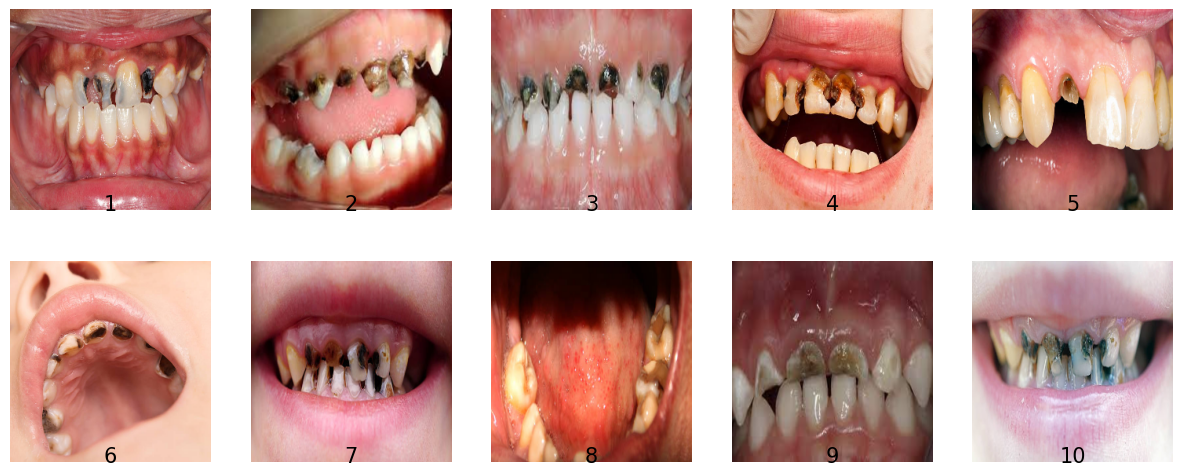

In [ ]:
#@title **Shape & Graficar 10 Imagenes**

# Ruta al directorio Training del dataset
training_dir = '/content/drive/MyDrive/Proyecto-IA/teeth_dataset/Training/'

# Lista para almacenar las imágenes
images = []

# Iterar sobre cada subcarpeta en la carpeta Training del dataset
for subfolder in os.listdir(training_dir):
    subfolder_path = os.path.join(training_dir, subfolder)

    # Verificar si el elemento es una carpeta
    if os.path.isdir(subfolder_path):
        # Iterar sobre cada archivo en la subcarpeta
        for file in os.listdir(subfolder_path):
            # Cargar la imagen
            img_path = os.path.join(subfolder_path, file)
            img = cv2.imread(img_path)

            # Verificar si la imagen se cargó correctamente
            if img is not None:
                # Asegurar que todas las imágenes tengan la misma forma (256x256)
                img = cv2.resize(img, (256, 256))
                # Agregar la imagen al arreglo
                images.append(img)
            else:
                print(f"No se pudo cargar la imagen: {img_path}")

# Convertir la lista a un arreglo de NumPy
images = np.array(images)

# Verificar las dimensiones de las imágenes
for img in images[:10]:
    print("Dimensiones de la imagen:", img.shape)

# Graficar 10 imágenes
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)) # Convertir de BGR a RGB para mostrar con plt.imshow()
    plt.axis('off') # Desactivar los ejes
    plt.text(128, 256, str(i+1), color='black', fontsize=15, ha='center')
plt.show()

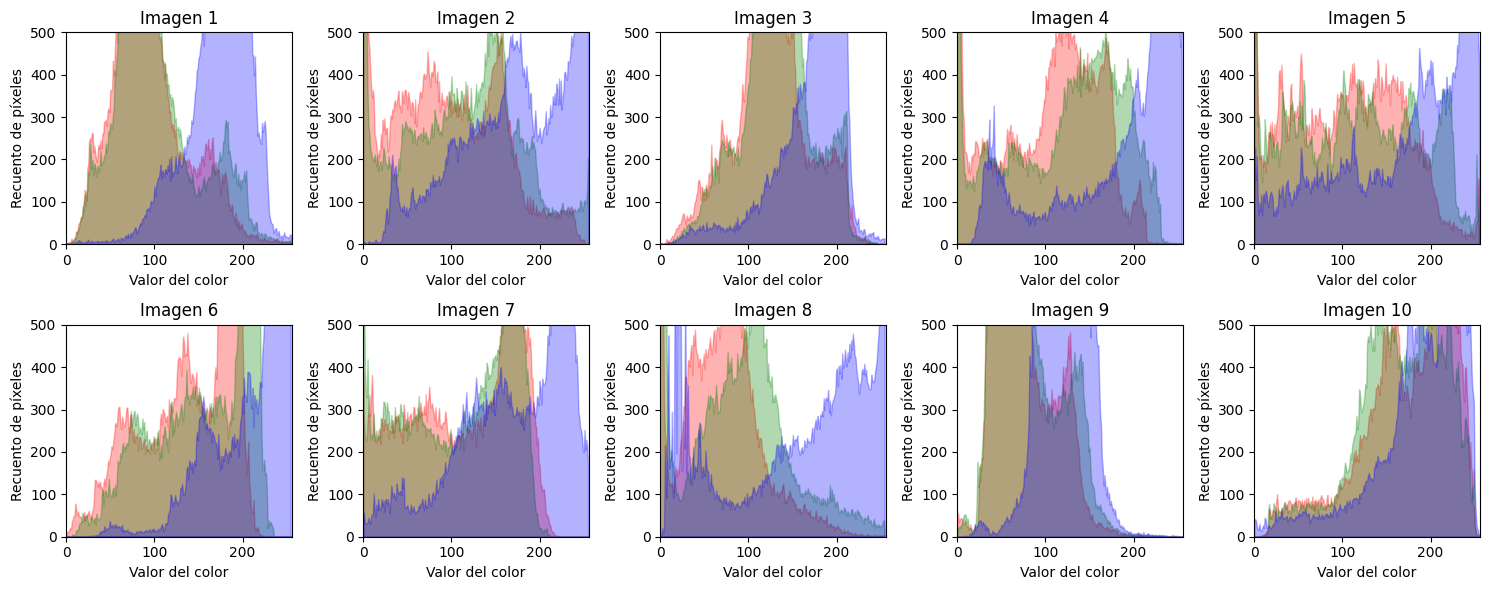

In [ ]:
#@title **Graficar los histogramas de las 10 imágenes**

plt.figure(figsize=(15, 6))

# Colores para cada canal de color (rojo, verde, azul)
colors = ("red", "green", "blue")

for i in range(10):
    plt.subplot(2, 5, i + 1)

    # Calcular el histograma de cada canal de color
    for channel_id, color in enumerate(colors):
        histogram, bin_edges = np.histogram(
            images[i][:, :, channel_id], bins=256, range=(0, 256)
        )
        plt.fill_between(bin_edges[:-1], histogram, color=color, alpha=0.3)

    plt.title(f'Imagen {i+1}')
    plt.xlabel("Valor del color")
    plt.ylabel("Recuento de píxeles")
    plt.xlim([0, 256])
    plt.ylim([0, 500]) # Ajustar el rango del eje y para mejorar la visualización

plt.tight_layout()
plt.show()


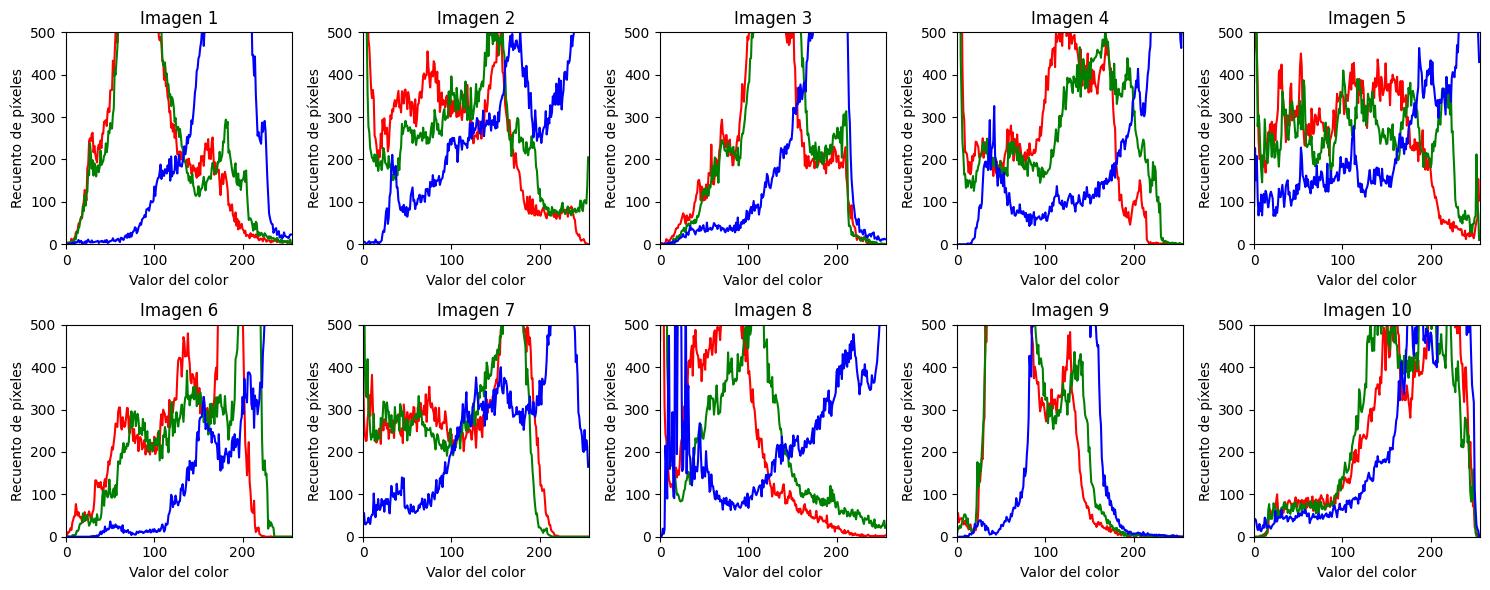

In [ ]:
#@title **Graficar los histogramas de las 10 imágenes**

plt.figure(figsize=(15, 6))

# Colores para cada canal de color (rojo, verde, azul)
colors = ("red", "green", "blue")

for i in range(10):
    plt.subplot(2, 5, i + 1)

    # Calcular el histograma de cada canal de color
    for channel_id, color in enumerate(colors):
        histogram, bin_edges = np.histogram(
            images[i][:, :, channel_id], bins=256, range=(0, 256)
        )
        plt.plot(bin_edges[0:-1], histogram, color=color)

    plt.title(f'Imagen {i+1}')
    plt.xlabel("Valor del color")
    plt.ylabel("Recuento de píxeles")
    plt.xlim([0, 256])
    plt.ylim([0, 500]) # Ajustar el rango del eje y para mejorar la visualización

plt.tight_layout()
plt.show()

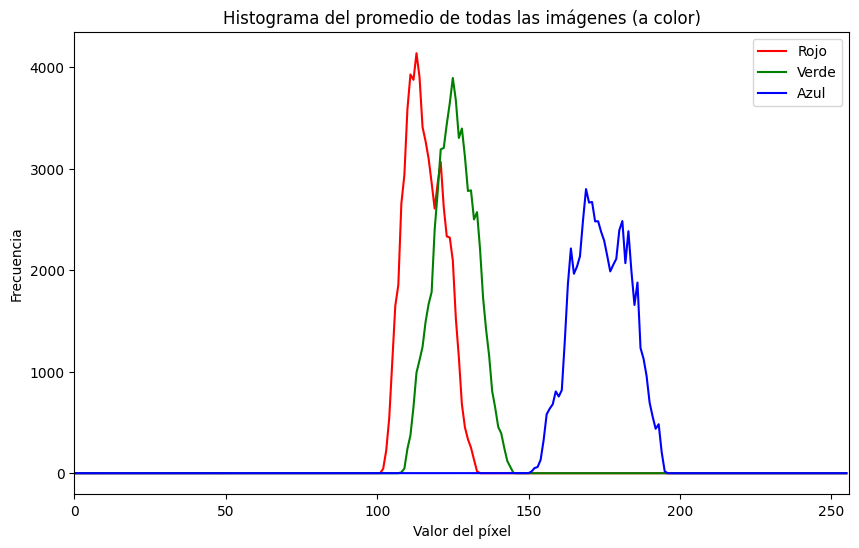

In [ ]:
#@title **Histograma promedio de todas las imagenes del dataset**

# Convertir la lista a un arreglo de NumPy
images = np.array(images)

# Calcular el promedio de todas las imágenes
average_image_color = np.mean(images, axis=0)

# Convertir la imagen promedio a tipo de datos uint8
average_image_color_uint8 = average_image_color.astype(np.uint8)

# Calcular los histogramas en cada canal de color
histogram_red = cv2.calcHist([average_image_color_uint8], [0], None, [256], [0, 256])
histogram_green = cv2.calcHist([average_image_color_uint8], [1], None, [256], [0, 256])
histogram_blue = cv2.calcHist([average_image_color_uint8], [2], None, [256], [0, 256])

# Graficar los histogramas en cada canal de color
plt.figure(figsize=(10, 6))
plt.plot(histogram_red, color='red', label='Rojo')
plt.plot(histogram_green, color='green', label='Verde')
plt.plot(histogram_blue, color='blue', label='Azul')
plt.title('Histograma del promedio de todas las imágenes (a color)')
plt.xlabel('Valor del píxel')
plt.ylabel('Frecuencia')
plt.xlim([0, 256])
plt.legend()

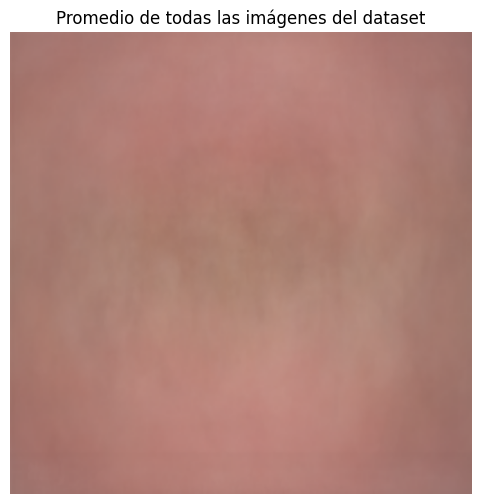

In [ ]:
#@title **Mostrar la imagen promedio**

# Calcular el promedio de todas las imágenes
average_image = np.mean(images, axis=0)

# Graficar el promedio de todas las imágenes
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(average_image.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Promedio de todas las imágenes del dataset')
plt.show()

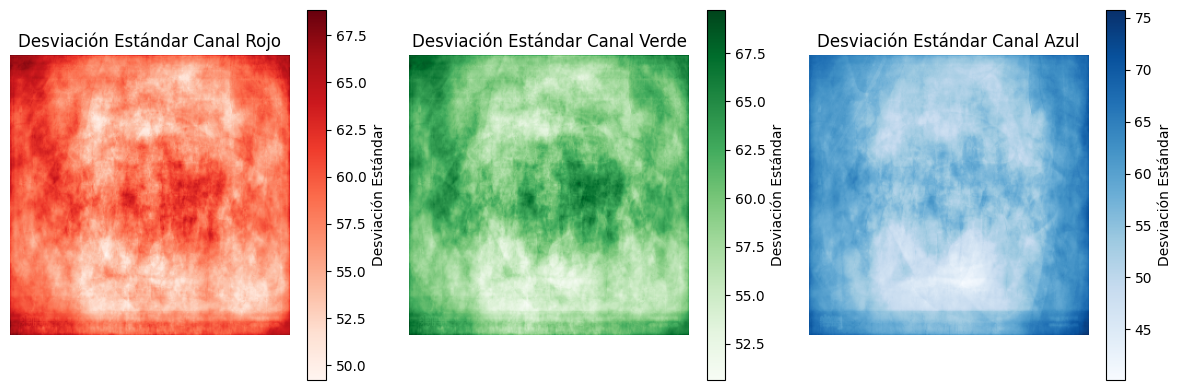

In [ ]:
#@title **Desviación estándar de todas las imágenes del dataset**

# Calcular la desviación estándar de cada canal de color por separado
std_dev_red = np.std(images[:, :, :, 0], axis=0)
std_dev_green = np.std(images[:, :, :, 1], axis=0)
std_dev_blue = np.std(images[:, :, :, 2], axis=0)

# Graficar la desviación estándar de cada canal de color como imágenes separadas
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(std_dev_red, cmap='Reds')
plt.title('Desviación Estándar Canal Rojo')
plt.colorbar(label='Desviación Estándar')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(std_dev_green, cmap='Greens')
plt.title('Desviación Estándar Canal Verde')
plt.colorbar(label='Desviación Estándar')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(std_dev_blue, cmap='Blues')
plt.title('Desviación Estándar Canal Azul')
plt.colorbar(label='Desviación Estándar')
plt.axis('off')
plt.tight_layout()
plt.show()


<ipython-input-18-d69606ad5b87>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Caries', 'without_caries'], y= section_counts,palette=colors)


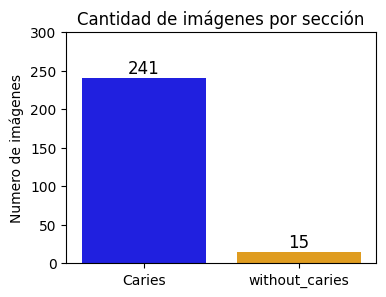

In [ ]:
#@title **Grafica de Barra**
# Ruta al directorio Training del dataset
training_dir = '/content/drive/MyDrive/Proyecto-IA/teeth_dataset/Training/'

# Lista para almacenar el nombre de cada sección
sections = ['caries', 'without_caries']
# Lista para almacenar la cantidad de imágenes en cada sección
section_counts = []

# Iterar sobre cada sección en la lista de secciones
for section in sections:
    # Construir la ruta completa de la sección|||||
    section_path = os.path.join(training_dir, section)
    # Contar la cantidad de archivos (imágenes) en la sección
    num_images = len(os.listdir(section_path))
    # Almacenar la cantidad de imágenes en la sección
    section_counts.append(num_images)

# Definir colores para cada barra
colors = ['blue', 'orange']

# Graficar el gráfico de barras para la cantidad de imágenes por sección
plt.figure(figsize=(4, 3))
sns.barplot(x=['Caries', 'without_caries'], y= section_counts,palette=colors)
plt.title('Cantidad de imágenes por sección')
plt.ylabel('Numero de imágenes')
plt.ylim(0, 300)
# Añadir el número de imágenes encima de cada barra
for i, count in enumerate(section_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

plt.show()


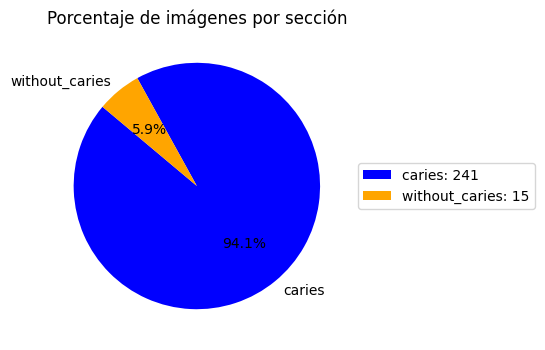

In [ ]:
#@title **Grafica de Pie**

# Graficar el gráfico de pastel para la cantidad de imágenes por sección
plt.figure(figsize=(4, 4))
patches, texts, autotexts = plt.pie(section_counts, labels=sections, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange'])
plt.title('Porcentaje de imágenes por sección')

# Crear leyenda con la cantidad de imágenes
plt.legend(patches, [f'{section}: {count}' for section, count in zip(sections, section_counts)], loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
#@title **Cargar Imágenes y Etiquetas**

import os
import cv2
import numpy as np

# Ruta al directorio Training del dataset
training_dir = '/content/drive/MyDrive/Proyecto-IA/teeth_dataset/Training/'

# Listas para almacenar las imágenes y las etiquetas
images = []
labels = []

# Iterar sobre cada subcarpeta en la carpeta Training del dataset
for subfolder in os.listdir(training_dir):
    subfolder_path = os.path.join(training_dir, subfolder)

    # Verificar si el elemento es una carpeta
    if os.path.isdir(subfolder_path):
        # Iterar sobre cada archivo en la subcarpeta
        for file in os.listdir(subfolder_path):
            # Cargar la imagen
            img_path = os.path.join(subfolder_path, file)
            img = cv2.imread(img_path)

            # Verificar si la imagen se cargó correctamente
            if img is not None:
                # Asegurar que todas las imágenes tengan la misma forma (256x256)
                img = cv2.resize(img, (256, 256))
                # Agregar la imagen al arreglo
                images.append(img)
                # Agregar la etiqueta correspondiente
                labels.append(subfolder)
            else:
                print(f"No se pudo cargar la imagen: {img_path}")

# Convertir las listas a arreglos de NumPy
images = np.array(images)
labels = np.array(labels)

print("Carga de imágenes y etiquetas completada.")
print(f"Total de imágenes: {len(images)}")
print(f"Total de etiquetas: {len(labels)}")


Carga de imágenes y etiquetas completada.
Total de imágenes: 256
Total de etiquetas: 256


In [ ]:
#@title **Aplanar Imágenes**

# Aplanar las imágenes de (n_samples, height, width, channels) a (n_samples, height * width * channels)
n_samples, height, width, channels = images.shape
images_flattened = images.reshape((n_samples, height * width * channels))

# Verificar las dimensiones
print(f"Dimensiones originales: {images.shape}")
print(f"Dimensiones aplanadas: {images_flattened.shape}")


Dimensiones originales: (256, 256, 256, 3)
Dimensiones aplanadas: (256, 196608)


In [ ]:
#@title **Preprocesamiento del Dataset**

# Normalizar las imágenes
def normalize_images(images):
    return images / 255.0

# Convertir las etiquetas a formato numérico
def convert_labels(labels):
    label_dict = {'caries': 0, 'without_caries': 1}
    return np.array([label_dict[label] for label in labels])

# Aplicar el preprocesamiento
images_flattened = normalize_images(images_flattened)

# Convertir las etiquetas
labels = convert_labels(labels)

print("Preprocesamiento completado.")


Preprocesamiento completado.


In [ ]:
#@title **Permutación y Particionado**

from sklearn.model_selection import train_test_split

# Permutar las filas
indices = np.random.permutation(len(images_flattened))
images_flattened, labels = images_flattened[indices], labels[indices]

# Particionar el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(images_flattened, labels, test_size=0.2, random_state=42)

print(f"Datos de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Datos de prueba: {X_test.shape}, {y_test.shape}")


Datos de entrenamiento: (204, 196608), (204,)
Datos de prueba: (52, 196608), (52,)


In [ ]:
#@title **DecisionTree**

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Crear el modelo
decision_tree = DecisionTreeClassifier()

# Entrenar el modelo
decision_tree.fit(X_train, y_train)

# Predecir y evaluar
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cross_val = cross_val_score(decision_tree, X_train, y_train, cv=5)

print(f"Accuracy: {accuracy}")
print(f"Cross Validation Score: {cross_val}")


Accuracy: 0.9038461538461539
Cross Validation Score: [0.92682927 0.90243902 0.97560976 0.90243902 0.825     ]


In [ ]:
#@title **RandomForest**

from sklearn.ensemble import RandomForestClassifier

# Crear el modelo
random_forest = RandomForestClassifier()

# Entrenar el modelo
random_forest.fit(X_train, y_train)

# Predecir y evaluar
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cross_val = cross_val_score(random_forest, X_train, y_train, cv=5)

print(f"Accuracy: {accuracy}")
print(f"Cross Validation Score: {cross_val}")


Accuracy: 0.8846153846153846
Cross Validation Score: [0.95121951 0.97560976 1.         0.92682927 1.        ]


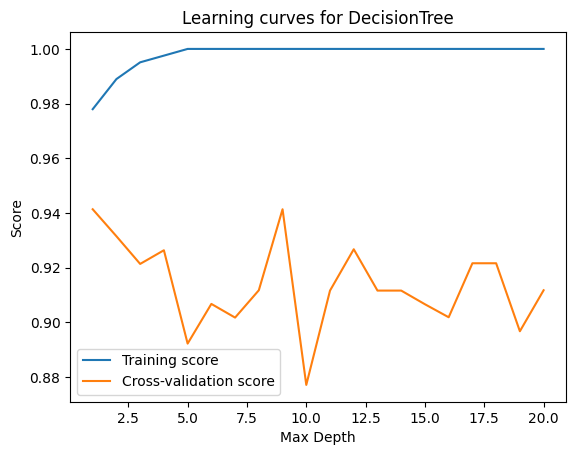

In [ ]:
#@title **Curvas de aprendizaje para DecisionTree**

from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

param_name = 'max_depth'
param_range = np.arange(1, 21)

train_scores, test_scores = validation_curve(DecisionTreeClassifier(), X_train, y_train,
                                             param_name=param_name, param_range=param_range, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_scores_mean, label='Training score')
plt.plot(param_range, test_scores_mean, label='Cross-validation score')
plt.title('Learning curves for DecisionTree')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.legend()
plt.show()


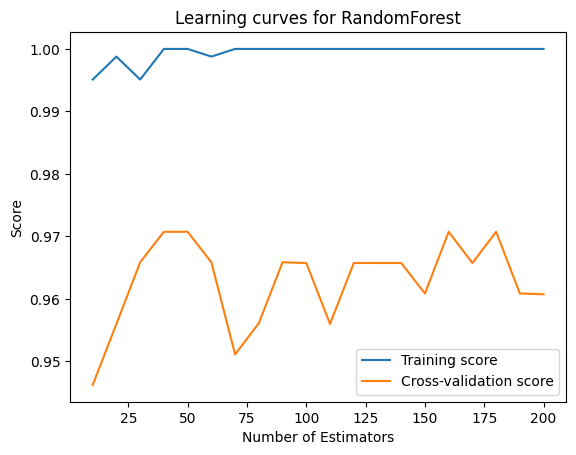

In [ ]:
#@title **Curvas de aprendizaje para RandomForest**

param_name = 'n_estimators'
param_range = np.arange(10, 201, 10)

train_scores, test_scores = validation_curve(RandomForestClassifier(), X_train, y_train,
                                             param_name=param_name, param_range=param_range, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_scores_mean, label='Training score')
plt.plot(param_range, test_scores_mean, label='Cross-validation score')
plt.title('Learning curves for RandomForest')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.legend()
plt.show()


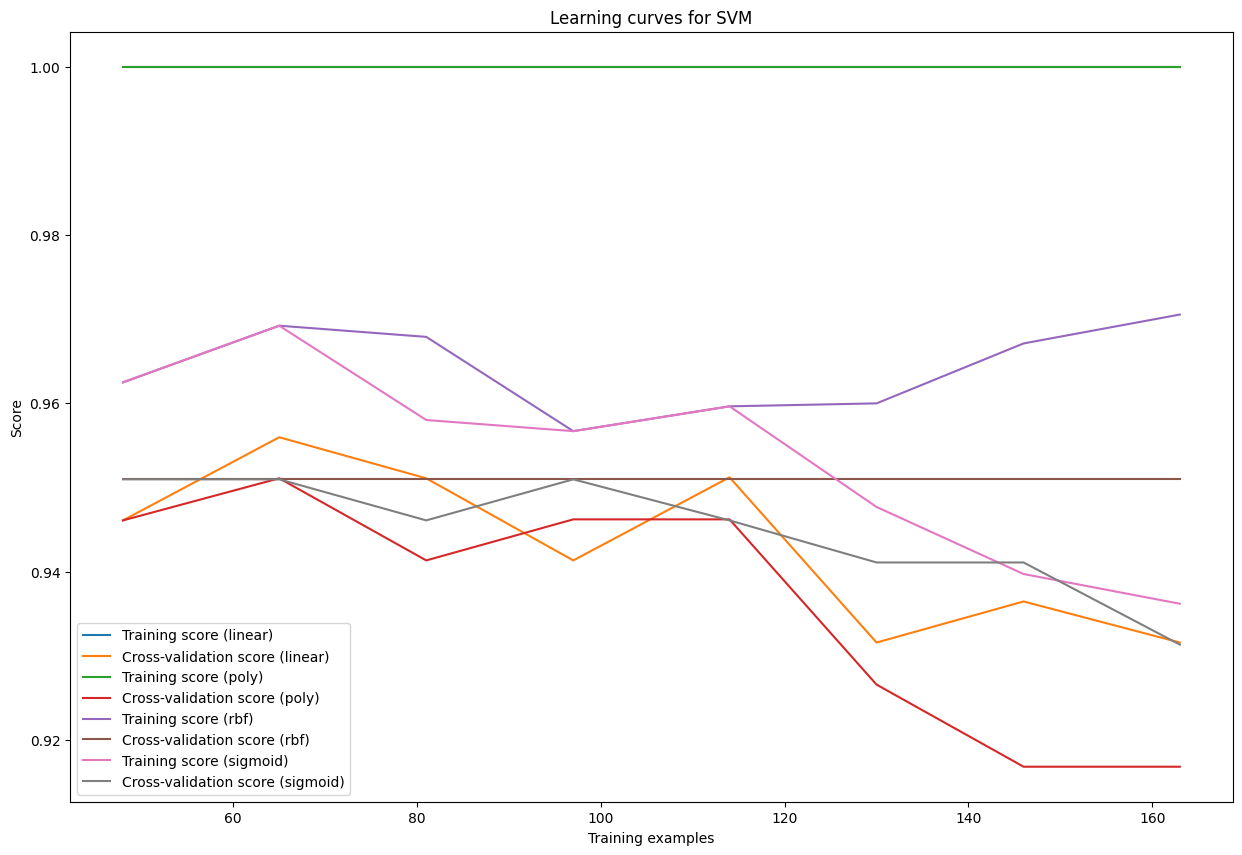

In [ ]:
#@title **Curvas de aprendizaje para SupportVectorMachine usando learning_curve**

from sklearn.model_selection import learning_curve

# Definir los parámetros para SVM
param_name = 'kernel'
param_range = ['linear', 'poly', 'rbf', 'sigmoid']

# Graficar los resultados
plt.figure(figsize=(15, 10))
for kernel in param_range:
    train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=kernel), X_train, y_train, cv=5,
                                                            train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, label=f'Training score ({kernel})')
    plt.plot(train_sizes, test_scores_mean, label=f'Cross-validation score ({kernel})')

plt.title('Learning curves for SVM')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()


In [ ]:
# Generar datos simulados
np.random.seed(42)
X = np.random.rand(1000, 20)  # 1000 muestras con 20 características
y = np.random.randint(2, size=1000)  # Etiquetas binarias aleatorias

# Partición del conjunto de datos (usando un split 80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Utilizar el clasificador DecisionTreeClassifier con parámetros por defecto
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy con DecisionTreeClassifier (default params): {accuracy_dt}")

# Tunning de parámetros DecisionTreeClassifier: max_depth y criterion
dt_classifier_tuned = DecisionTreeClassifier(max_depth=10, criterion='gini')
dt_classifier_tuned.fit(X_train, y_train)
y_pred_dt_tuned = dt_classifier_tuned.predict(X_test)
accuracy_dt_tuned = accuracy_score(y_test, y_pred_dt_tuned)
print(f"Accuracy con DecisionTreeClassifier (tuned params): {accuracy_dt_tuned}")

Accuracy con DecisionTreeClassifier (default params): 0.505
Accuracy con DecisionTreeClassifier (tuned params): 0.515


In [ ]:
# Utilizar el clasificador RandomForestClassifier con parámetros por defecto
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy con RandomForestClassifier (default params): {accuracy_rf}")

# Tunning de parámetros RandomForestClassifier: n_estimators, max_depth y criterion
rf_classifier_tuned = RandomForestClassifier(n_estimators=100, max_depth=10, criterion='gini')
rf_classifier_tuned.fit(X_train, y_train)
y_pred_rf_tuned = rf_classifier_tuned.predict(X_test)
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
print(f"Accuracy con RandomForestClassifier (tuned params): {accuracy_rf_tuned}")

Accuracy con RandomForestClassifier (default params): 0.485
Accuracy con RandomForestClassifier (tuned params): 0.495


In [ ]:
# Utilizar el clasificador SVC con parámetros por defecto
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred_svc = svc_classifier.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"Accuracy con SVC (default params): {accuracy_svc}")

# Tunning de parámetros SVC: kernel
svc_classifier_tuned = SVC(kernel='linear')
svc_classifier_tuned.fit(X_train, y_train)
y_pred_svc_tuned = svc_classifier_tuned.predict(X_test)
accuracy_svc_tuned = accuracy_score(y_test, y_pred_svc_tuned)
print(f"Accuracy con SVC (tuned params): {accuracy_svc_tuned}")


Accuracy con SVC (default params): 0.445
Accuracy con SVC (tuned params): 0.55


In [ ]:
# Definir la arquitectura de la red neuronal artificial simple
def build_nn(input_dim, hidden_layers, epochs, num_classes):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))  # Capa de entrada
    for _ in range(hidden_layers):
        model.add(Dense(64, activation='relu'))  # Capas ocultas
    model.add(Dense(num_classes, activation='softmax'))  # Capa de salida para clasificación multiclase

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=0)
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return accuracy

# Experimentos con diferentes configuraciones de capas ocultas y epochs
num_classes = len(np.unique(y))  # Obtener el número de clases en los datos
for hidden_layers in [1, 3, 6]:
    for epochs in [10, 20, 30]:
        accuracy_nn = build_nn(X_train.shape[1], hidden_layers, epochs, num_classes)
        print(f"Accuracy con red neuronal ({hidden_layers} capas ocultas, {epochs} epochs): {accuracy_nn}")



Accuracy con red neuronal (1 capas ocultas, 10 epochs): 0.3100000023841858
Accuracy con red neuronal (1 capas ocultas, 20 epochs): 0.3449999988079071
Accuracy con red neuronal (1 capas ocultas, 30 epochs): 0.28999999165534973
Accuracy con red neuronal (3 capas ocultas, 10 epochs): 0.2849999964237213
Accuracy con red neuronal (3 capas ocultas, 20 epochs): 0.26499998569488525
Accuracy con red neuronal (3 capas ocultas, 30 epochs): 0.3100000023841858
Accuracy con red neuronal (6 capas ocultas, 10 epochs): 0.29499998688697815
Accuracy con red neuronal (6 capas ocultas, 20 epochs): 0.30000001192092896
Accuracy con red neuronal (6 capas ocultas, 30 epochs): 0.30000001192092896
